# Predicting Risky Customers using Decision Tree Classification  (German credit dataset from IBM)

We'll use this notebook to create a machine learning model to predict customer churn. Dataset consists of 5,000 customers, 20 features.  Target label is risk and this is a binary classification problem.   As the number of features are quite large (~19), we have decided to use various decision tree models instead of logistic regression.  We will split the data into train and test sets with cross validation.  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import os

In [4]:
df = pd.read_csv('/Users/lenkwok/Desktop/german_credit_data.csv')
df.head()

,CustomerID,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,...,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk
0,713a336c-a255-4e2d-9d57-90b3e99e2f06,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
1,140b363f-a3fe-4828-a33f-7284dfdb3969,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,...,savings_insurance,37,stores,own,2,skilled,1,none,yes,No Risk
2,43b7b51d-5eda-4860-b461-ebef3d3436f4,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,...,real_estate,28,none,own,2,skilled,1,yes,no,No Risk
3,f40eaf08-e6d1-4765-ab20-c5f7faca1635,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
4,1728910a-d3ff-4799-ac50-203a3a58a3fb,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,...,unknown,57,none,own,2,skilled,1,none,yes,Risk


### Drop Some Features
Some columns are data attributes that we will not want to use in the machine learning model. We can drop those columns / features:

- CustomerID feature (column)
- Personal Attributes: first_name,last_name,email,street_address,city,state,postal_code 

In [73]:
#Drop some columns, ignoring errors for missing keys in case we use different data sets.
df = df.drop(columns=['CustomerID', 'FirstName', 'LastName', 'Email', 'StreetAddress', 'City', 'State', 'PostalCode', '_ID'], axis=1, errors='ignore')

df.head(5)

,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,...,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk
0,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
1,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,none,...,savings_insurance,37,stores,own,2,skilled,1,none,yes,No Risk
2,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,none,...,real_estate,28,none,own,2,skilled,1,yes,no,No Risk
3,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
4,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,none,...,unknown,57,none,own,2,skilled,1,none,yes,Risk


### Examine the data types of the features

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CheckingStatus            5000 non-null   object
 1   LoanDuration              5000 non-null   int64 
 2   CreditHistory             5000 non-null   object
 3   LoanPurpose               5000 non-null   object
 4   LoanAmount                5000 non-null   int64 
 5   ExistingSavings           5000 non-null   object
 6   EmploymentDuration        5000 non-null   object
 7   InstallmentPercent        5000 non-null   int64 
 8   Sex                       5000 non-null   object
 9   OthersOnLoan              5000 non-null   object
 10  CurrentResidenceDuration  5000 non-null   int64 
 11  OwnsProperty              5000 non-null   object
 12  Age                       5000 non-null   int64 
 13  InstallmentPlans          5000 non-null   object
 14  Housing                 

In [70]:
df.describe()

,LoanDuration,LoanAmount,InstallmentPercent,CurrentResidenceDuration,Age,ExistingCreditsCount,Dependents
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,21.393000,3480.145000,2.982400,2.854200,35.932400,1.465800,1.164600
std,11.162843,2488.232783,1.127096,1.115702,10.648536,0.565415,0.370856
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,13.000000,1326.750000,2.000000,2.000000,28.000000,1.000000,1.000000
50%,21.000000,3238.500000,3.000000,3.000000,36.000000,1.000000,1.000000
75%,29.000000,5355.000000,4.000000,4.000000,44.000000,2.000000,1.000000
max,64.000000,11676.000000,6.000000,6.000000,74.000000,4.000000,2.000000


We see that the loan amounts range from 250 to ~11,600. That the age range for applicants is between 19 and 74. etc.

### Check for missing data

We should check if there are missing values in our dataset. There are various ways we can address this issue:

- Drop records with missing values 
- Fill in the missing value with one of the following strategies: Zero, Mean of the values for the column, Random value, etc).

In [71]:
# Check if we have any NaN values and see which features have missing values that should be addressed
print(df.isnull().values.any())
df.isnull().sum()

False


CheckingStatus              0
LoanDuration                0
CreditHistory               0
LoanPurpose                 0
LoanAmount                  0
ExistingSavings             0
EmploymentDuration          0
InstallmentPercent          0
Sex                         0
OthersOnLoan                0
CurrentResidenceDuration    0
OwnsProperty                0
Age                         0
InstallmentPlans            0
Housing                     0
ExistingCreditsCount        0
Job                         0
Dependents                  0
Telephone                   0
ForeignWorker               0
Risk                        0
dtype: int64

Depending on which version of the dataset that you used, there may be no missing values. If there are any missing values from the output above, the sample below would be one approach to handle this issue by imputing the values for the column that reported missing data (i.e the `CurrentResidenceDuration` column in the code as an example):


In [9]:
## Handle missing values for nan_column (CurrentResidenceDuration)
#from sklearn.impute import SimpleImputer

## Find the column number for TotalCharges (starting at 0).
#target_idx = df.columns.get_loc("CurrentResidenceDuration")
#imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
#df.iloc[:, target_idx] = imputer.fit_transform(df.iloc[:, target_idx].values.reshape(-1, 1))
#df.iloc[:, target_idx] = pd.Series(df.iloc[:, target_idx])

### Categorize Features

We will categorize some of the columns / features based on wether they are categorical values or continuous (i.e numerical) values. We will use this in later sections to build visualizations.

In [72]:
TARGET_LABEL_COLUMN_NAME = 'Risk'
columns_idx = np.s_[0:] # Slice of first row(header) with all columns.
first_record_idx = np.s_[0] # Index of first record

string_fields = [type(fld) is str for fld in df.iloc[first_record_idx, columns_idx]] # All string fields
all_features = [x for x in df.columns if x != TARGET_LABEL_COLUMN_NAME]
categorical_columns = list(np.array(df.columns)[columns_idx][string_fields])
categorical_features = [x for x in categorical_columns if x != TARGET_LABEL_COLUMN_NAME]
continuous_features = [x for x in all_features if x not in categorical_features]

print('All Features: ', all_features)
print('\nCategorical Features: ', categorical_features)
print('\nContinuous Features: ', continuous_features)
print('\nAll Categorical Columns: ', categorical_columns)

All Features:  ['CheckingStatus', 'LoanDuration', 'CreditHistory', 'LoanPurpose', 'LoanAmount', 'ExistingSavings', 'EmploymentDuration', 'InstallmentPercent', 'Sex', 'OthersOnLoan', 'CurrentResidenceDuration', 'OwnsProperty', 'Age', 'InstallmentPlans', 'Housing', 'ExistingCreditsCount', 'Job', 'Dependents', 'Telephone', 'ForeignWorker']

Categorical Features:  ['CheckingStatus', 'CreditHistory', 'LoanPurpose', 'ExistingSavings', 'EmploymentDuration', 'Sex', 'OthersOnLoan', 'OwnsProperty', 'InstallmentPlans', 'Housing', 'Job', 'Telephone', 'ForeignWorker']

Continuous Features:  ['LoanDuration', 'LoanAmount', 'InstallmentPercent', 'CurrentResidenceDuration', 'Age', 'ExistingCreditsCount', 'Dependents']

All Categorical Columns:  ['CheckingStatus', 'CreditHistory', 'LoanPurpose', 'ExistingSavings', 'EmploymentDuration', 'Sex', 'OthersOnLoan', 'OwnsProperty', 'InstallmentPlans', 'Housing', 'Job', 'Telephone', 'ForeignWorker', 'Risk']


### Visualize data

Data visualization can be used to find patterns, detect outliers, understand distribution and more. We can use graphs such as:

- Histograms, boxplots, etc: To find distribution / spread of our continuous variables.
- Bar charts: To show frequency in categorical values.


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

%matplotlib inline
sns.set(style="darkgrid")
sns.set_palette("hls", 3)

First, we get a high level view of the distribution of Risk. What percentage of applicants in our dataset represent Risk vs No Risk.

Risk
No Risk    3330
Risk       1670
dtype: int64


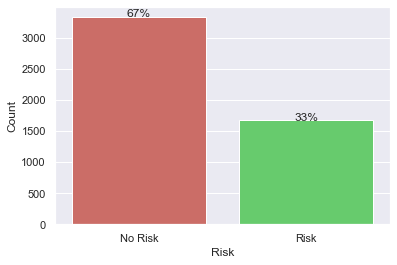

In [12]:
print(df.groupby([TARGET_LABEL_COLUMN_NAME]).size())
risk_plot = sns.countplot(data=df, x=TARGET_LABEL_COLUMN_NAME, order=df[TARGET_LABEL_COLUMN_NAME].value_counts().index)
plt.ylabel('Count')
for p in risk_plot.patches:
    height = p.get_height()
    risk_plot.text(p.get_x()+p.get_width()/2., height + 1,'{0:.0%}'.format(height/float(len(df))),ha="center") 
plt.show()

We can get use frequency counts charts to get an understanding of the categorical features relative to Risk

- We can see in the `CheckingStatus` visualization, loan applications with 'no_checking' have a higher occurence of Risk versus loans with other checking status values.
- We can see in the `CreditHistory` visualization, the loans that have no credits (i.e. all credit has been paid back) have no occurences of Risk (at least in this dataset). There is a small count of Risk for those applicants that have paid back all credit to date. And there is a higher frequency or ratio of Risk for applicants that have existing credit (i.e outstanding credit).

### NOTE: The creation of these plots can take several minutes

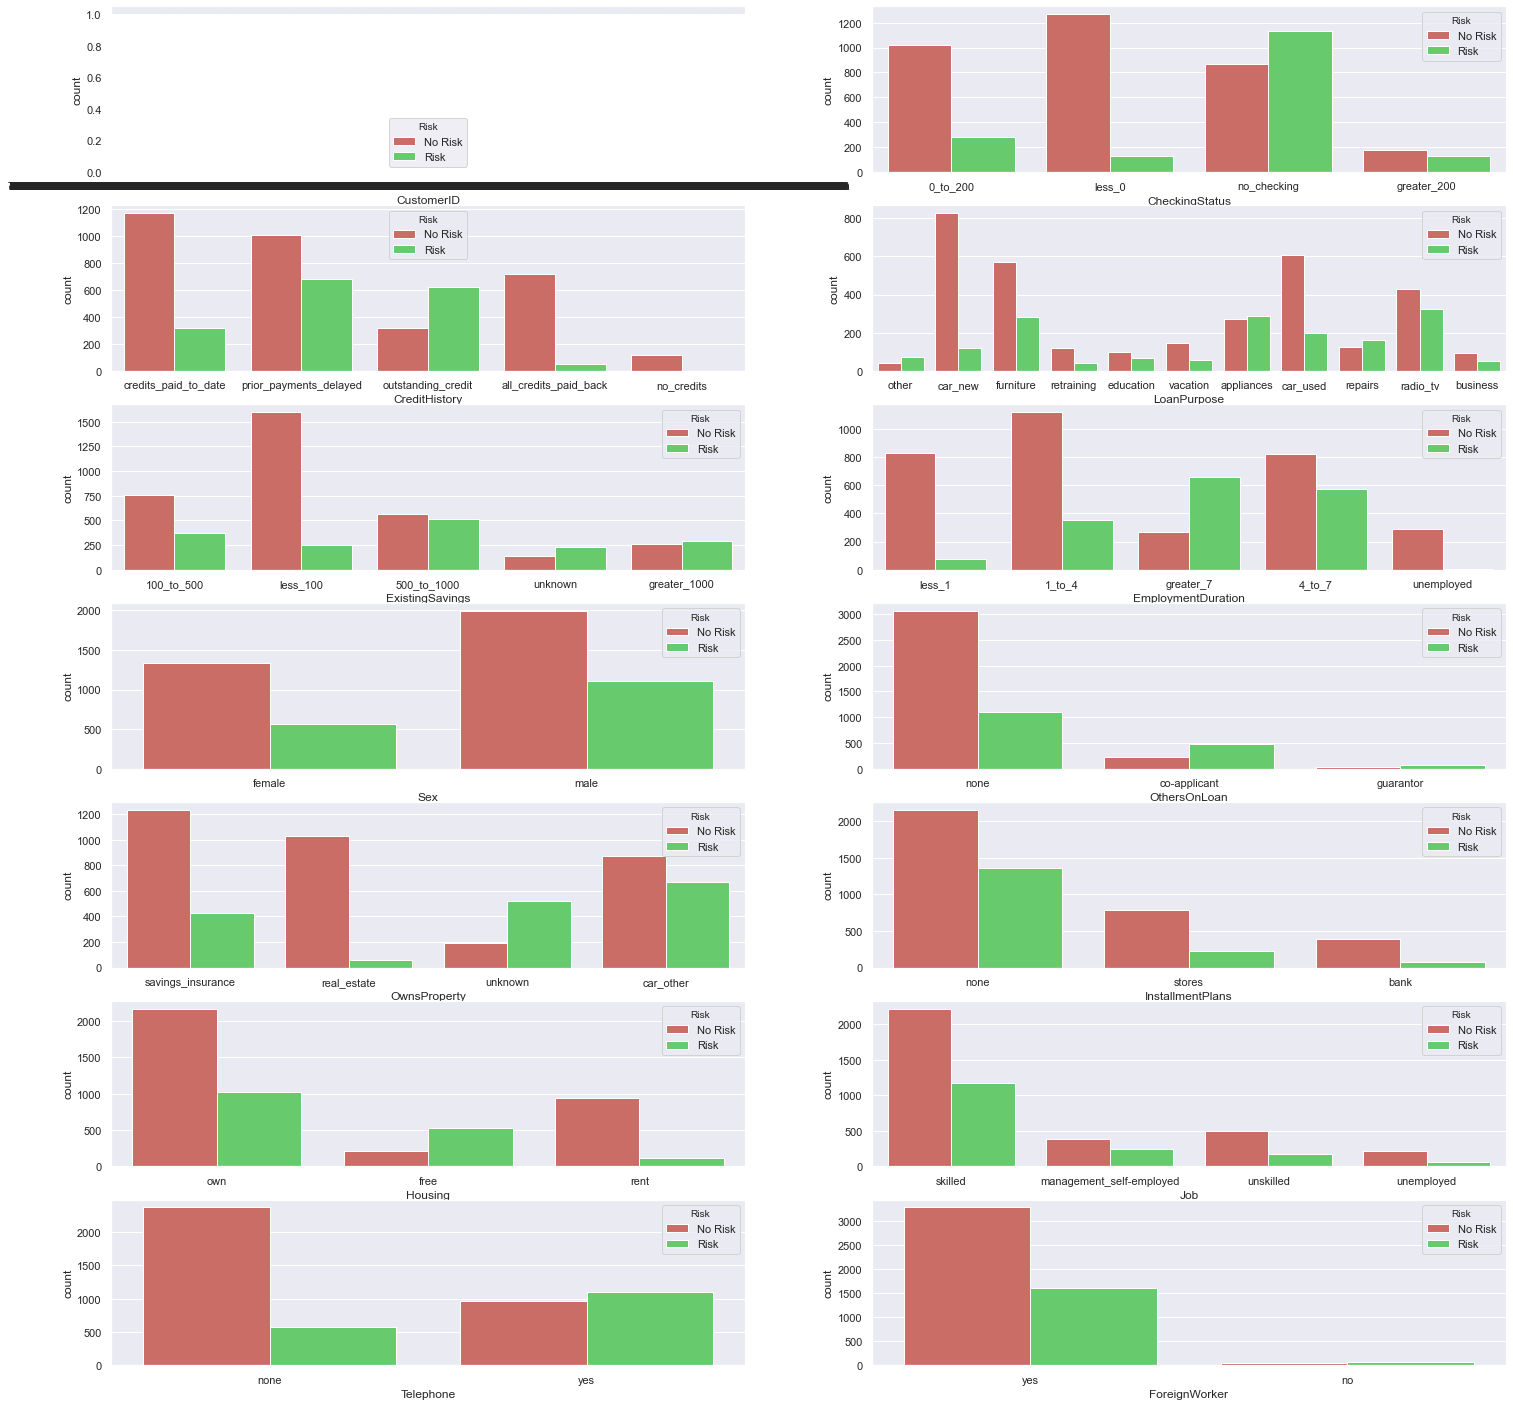

In [11]:
# Categorical feature count plots
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14)) = plt.subplots(7, 2, figsize=(25, 25))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14 ]

for i in range(len(categorical_features)):
    sns.countplot(x = categorical_features[i], hue=TARGET_LABEL_COLUMN_NAME, data=df, ax=ax[i])
    

We can get use histrogram and boxplots to get an understanding of the distribution of our continuous / numerical features relative to Risk.

- We can see that for loans that have Risk, the `InstallmentPercent` tends to be higher (i.e. the loans with Risk tend to have loan amounts with higher percentage of the loan applicants disposable income).
- We can see that those with 'No Risk' seem to be those with fewer existing credit loans at the bank (`ExistingCreditCount`)


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

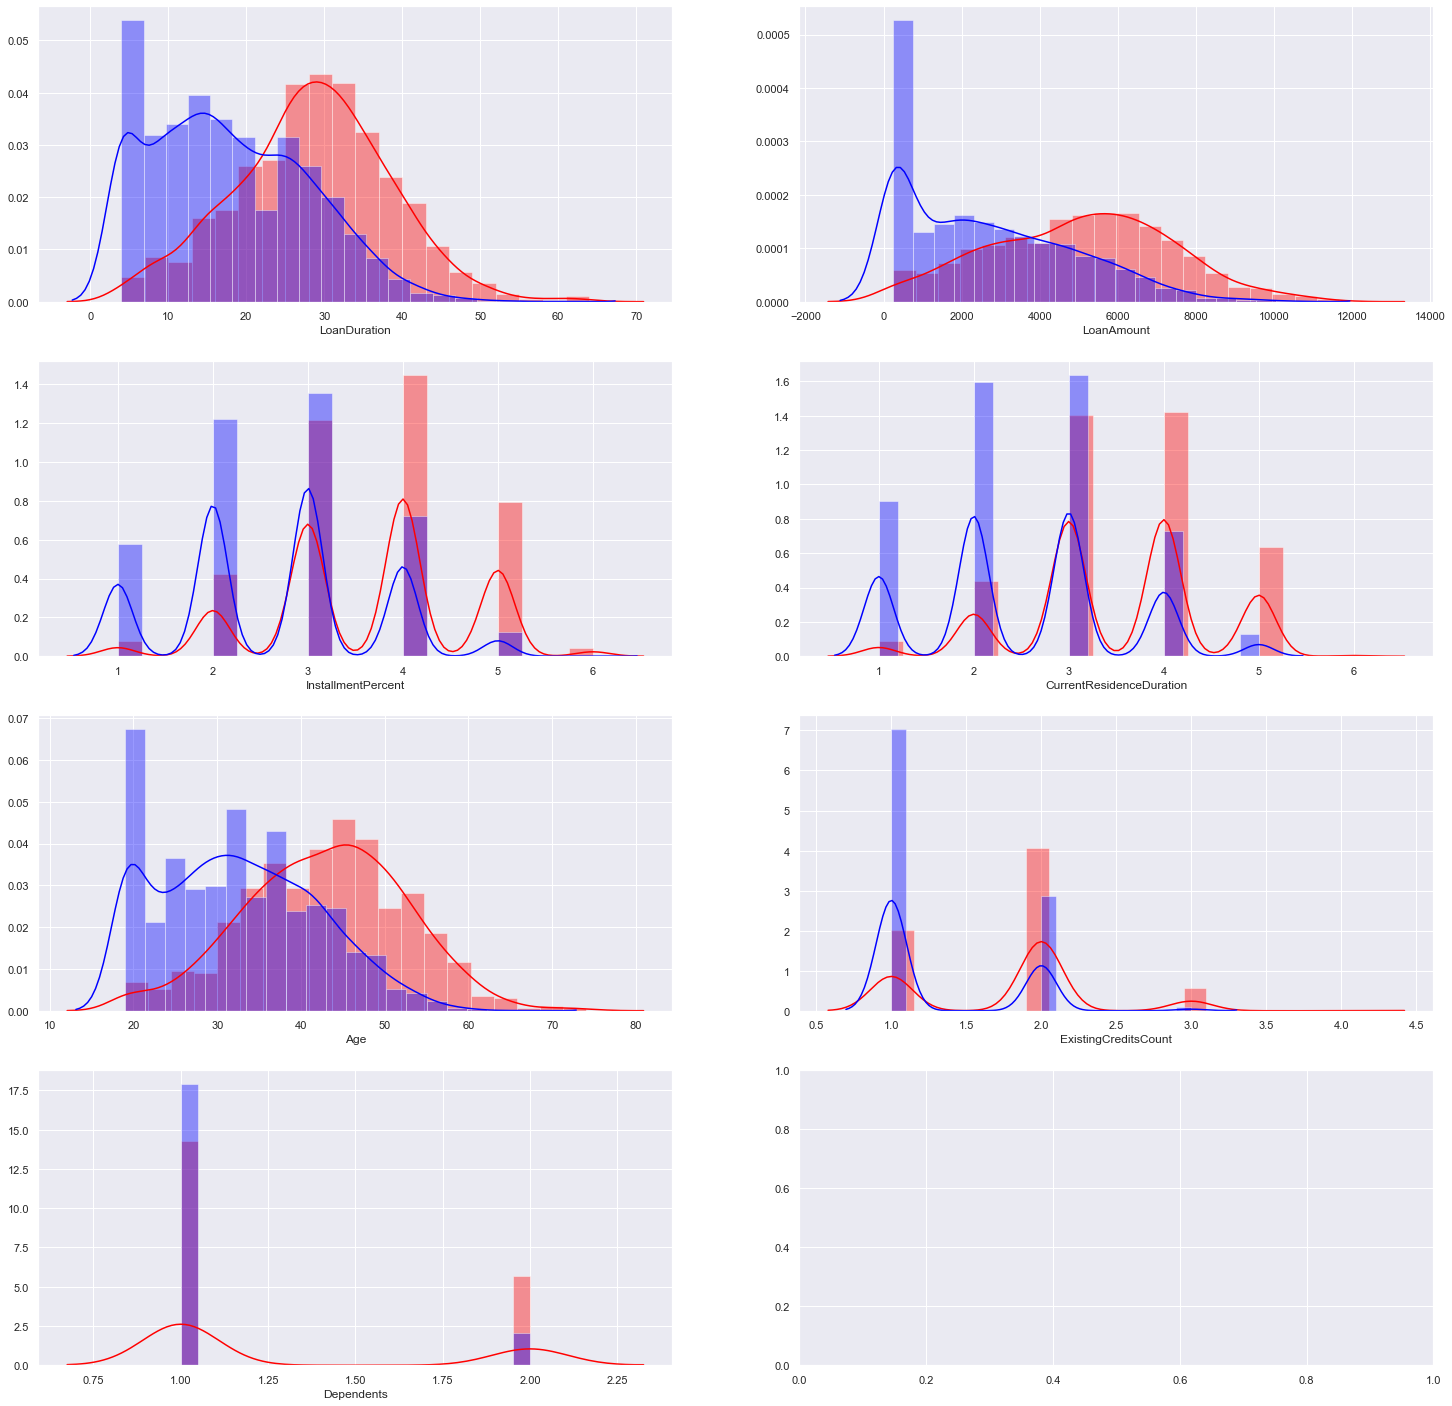

In [13]:
# Continuous feature histograms.
f, ((ax1, ax2),(ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(25, 25))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
for i in range(len(continuous_features)):
    #sns.distplot(df[continuous_features[i]], bins=20, color="blue", hist=True, ax=ax[i])
    sns.distplot(df[df.Risk == 'Risk'][continuous_features[i]], bins=20, color="Red", hist=True, ax=ax[i])
    sns.distplot(df[df.Risk == 'No Risk'][continuous_features[i]], bins=20, color="blue", hist=True, ax=ax[i])


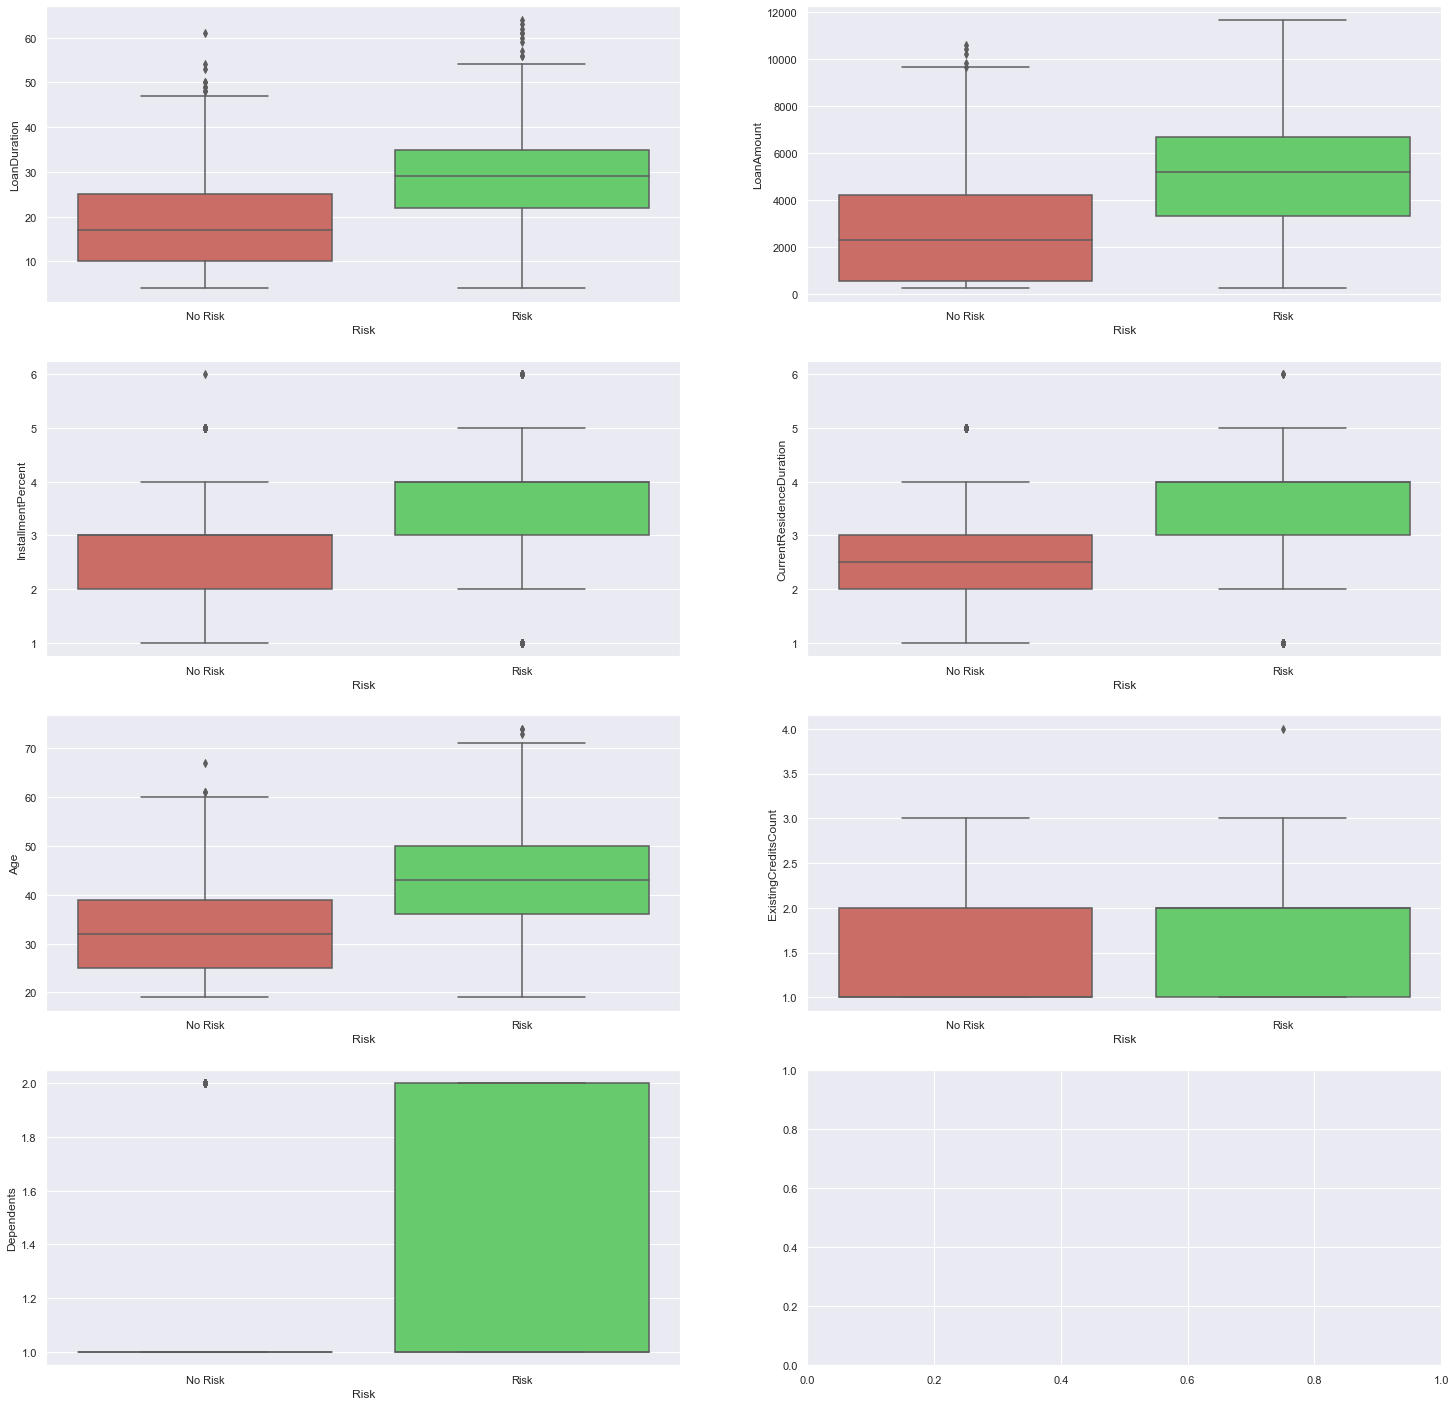

In [14]:
# Plot boxplots of numerical columns. More variation in the boxplot implies higher significance. 
f, ((ax1, ax2),(ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(25, 25))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
for i in range(len(continuous_features)):
    sns.boxplot(x = TARGET_LABEL_COLUMN_NAME, y = continuous_features[i], data=df, ax=ax[i])


In [105]:
X = final_data.drop('Risk',axis=1)
y = df['Risk']

In [106]:
from sklearn.model_selection import train_test_split 

### Split the data into training and test sets

In [107]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Training a Decision Tree Model

Let's start by training a single decision tree first!

In [87]:
from sklearn.tree import DecisionTreeClassifier

# Use Decision Tree with cross validation

In [116]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [135]:
kfold = KFold(n_splits = 10, random_state = 7)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
results = cross_val_score(dt, X_train, y_train, cv = kfold)
print('Decision Tree, Cross-Validation mean: %.4f' % results.mean())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Decision Tree, Cross-Validation mean: 0.7080


In [136]:
predict_dt= dt.predict(X_test)

In [137]:
from sklearn.metrics import confusion_matrix,classification_report

In [138]:
print(classification_report(y_test,predict_dt))

              precision    recall  f1-score   support

     No Risk       0.79      0.74      0.77      1002
        Risk       0.54      0.61      0.57       498

    accuracy                           0.70      1500
   macro avg       0.67      0.68      0.67      1500
weighted avg       0.71      0.70      0.70      1500



In [ ]:
# Accuracy obtained for decision tree with cross validation is 70%

In [139]:
print(confusion_matrix(y_test,predict_dt))

[[746 256]
 [196 302]]


# Training the Random Forest model with cross validation


In [94]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
kfold = KFold(n_splits = 10, random_state = 7)
rf = RandomForestClassifier(n_estimators=600)
rf.fit(X_train, y_train)
results = cross_val_score(rf, X_train, y_train, cv = kfold)
print('Random Forest, Cross-Validation mean: %.4f' % results.mean())

Random Forest, Cross-Validation mean: 0.8017


In [141]:
predict_rf= rf.predict(X_test)

In [142]:
print(classification_report(y_test,predict_rf))

              precision    recall  f1-score   support

     No Risk       0.81      0.92      0.86      1002
        Risk       0.78      0.57      0.66       498

    accuracy                           0.80      1500
   macro avg       0.80      0.74      0.76      1500
weighted avg       0.80      0.80      0.79      1500



In [143]:
print(confusion_matrix(y_test,predict_rf))

[[923  79]
 [215 283]]


In [ ]:
# Accuracy obtained for random forest model with cross validation is 70%

# Use Bagging with cross validation

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [144]:
num_trees = 100
bg = BaggingClassifier(base_estimator = cart, n_estimators = num_trees, random_state = 7)
bg.fit(X_train, y_train)
results = cross_val_score(bg, X_train, y_train, cv = kfold)
print('Bagging, Cross-Validation mean: %.4f' % results.mean())

Bagging, Cross-Validation mean: 0.7997


In [145]:
predict_bg= bg.predict(X_test)

In [146]:
print(classification_report(y_test,predict_bg))

              precision    recall  f1-score   support

     No Risk       0.82      0.92      0.87      1002
        Risk       0.79      0.58      0.67       498

    accuracy                           0.81      1500
   macro avg       0.80      0.75      0.77      1500
weighted avg       0.81      0.81      0.80      1500



In [ ]:
# Accuracy obtained for bagging mdodel with cross validation is 81%

In [147]:
print(confusion_matrix(y_test,predict_bg))

[[925  77]
 [209 289]]


# Use Boosting (AdaBoost) with cross validation

In [148]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection

In [149]:
seed = 7
num_trees = 70
kfold = model_selection.KFold(n_splits = 10, random_state = seed)
ab = AdaBoostClassifier(n_estimators = num_trees, random_state = seed)
ab.fit(X_train, y_train)
results = model_selection.cross_val_score(ab, X_train, y_train, cv = kfold)
print('AdaBoost, Cross-Validation mean: %.4f' % results.mean())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


AdaBoost, Cross-Validation mean: 0.7911


In [150]:
predict_ab= ab.predict(X_test)

In [151]:
print(classification_report(y_test,predict_ab))

              precision    recall  f1-score   support

     No Risk       0.83      0.88      0.85      1002
        Risk       0.72      0.64      0.68       498

    accuracy                           0.80      1500
   macro avg       0.77      0.76      0.76      1500
weighted avg       0.79      0.80      0.79      1500



In [ ]:
print(confusion_matrix(y_test,predict_ab))

In [ ]:
# Accuracy obtained for bagging mdodel with cross validation is 80%

# Conclusion:  Bagging with cross validation produces best accuracy when predicting whether a customer is labelled risky or not, with a value of 81%.  